<a href="https://colab.research.google.com/github/priya4565/ml-lab/blob/main/CSE20151_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv',error_bad_lines=False)
df

/tmp/ipykernel_25391/2122597187.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv',error_bad_lines=False)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [ ]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [ ]:
X=df.iloc[:,1:]
y=df.loc[:,'Species']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit(X)
X_scaled=minmax.transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Y_en=lb.fit_transform(y)

In [ ]:
Y_en

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [ ]:
X_scaled

array([[1.46666667e-01, 3.04854369e-01, 3.09090909e-01, 3.58108108e-01,
        5.68334049e-01, 4.18978349e-01],
       [1.75757576e-01, 3.20388350e-01, 3.25454545e-01, 3.78378378e-01,
        6.24055350e-01, 4.59235453e-01],
       [2.06060606e-01, 3.18446602e-01, 3.29090909e-01, 3.76689189e-01,
        6.18123353e-01, 5.14278868e-01],
       [2.20000000e-01, 3.65048544e-01, 3.74545455e-01, 4.17229730e-01,
        6.38566105e-01, 4.80364795e-01],
       [2.60606061e-01, 3.68932039e-01, 3.74545455e-01, 4.25675676e-01,
        6.21965801e-01, 5.76003608e-01],
       [2.72727273e-01, 3.74757282e-01, 3.87272727e-01, 4.37500000e-01,
        6.89202837e-01, 5.46882048e-01],
       [3.03030303e-01, 3.74757282e-01, 3.87272727e-01, 4.34121622e-01,
        7.22699465e-01, 5.96371786e-01],
       [2.36363636e-01, 3.90291262e-01, 3.92727273e-01, 4.42567568e-01,
        6.35083524e-01, 5.13419035e-01],
       [2.72727273e-01, 3.90291262e-01, 3.92727273e-01, 4.44256757e-01,
        7.12565153e-01, 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y_en,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy: {:.2f}%".format(acc*100))
#FOR TEST SIZE=0.3 ACCURACY=70.83%

Accuracy: 81.25%


Text(0.5, 1.0, 'Confusion matrix')

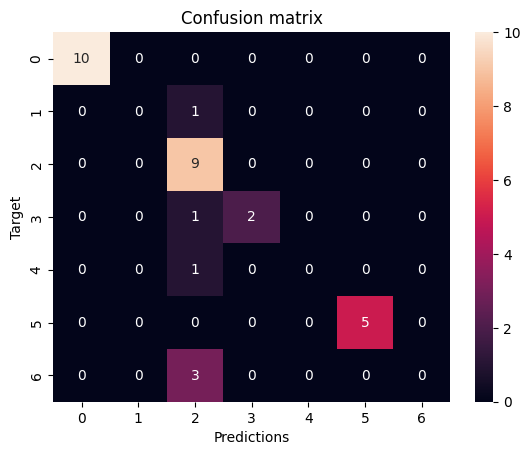

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cm,annot=True)
plt.xlabel('Predictions')
plt.ylabel('Target')
plt.title('Confusion matrix')